Lakukan preprocessing dan visualisasi pada data diabetes dengan ketentuan :
1. Imputasi missing value dengan mean, median, dan modus
2. Cek korelasi antar variabel dengan heatmap
3. Lakukan imbalance handling dengan undersampling
4. Lakukan scaling dengan robust scaler dan minmax

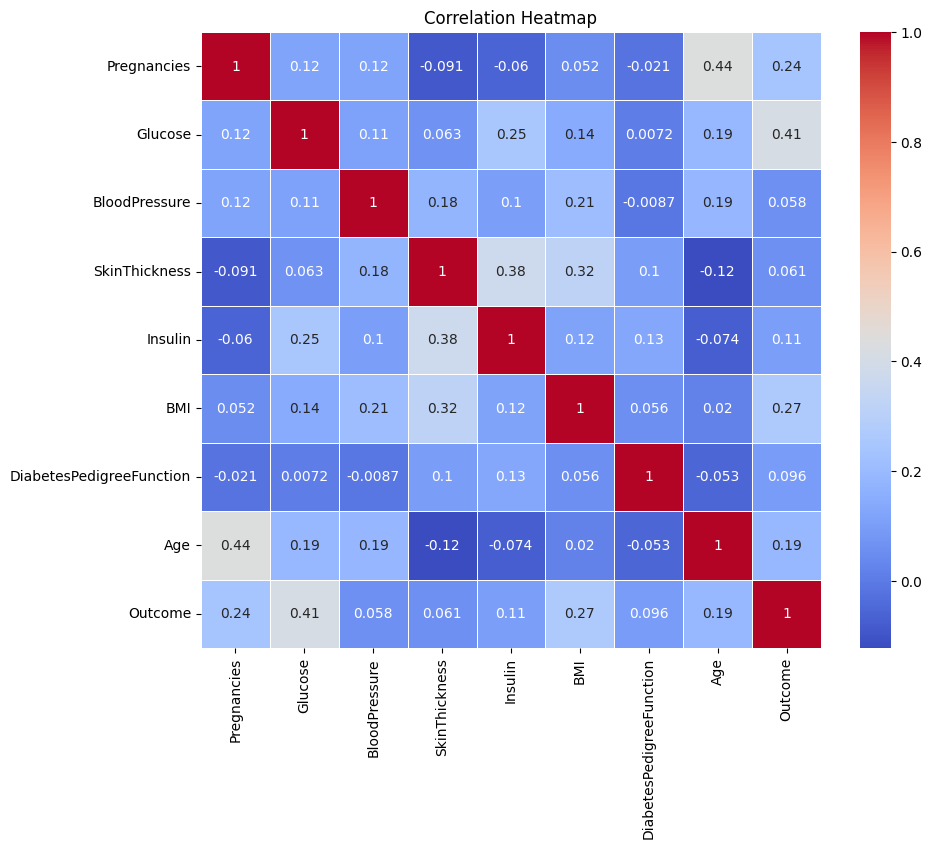

Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    268
1    268
Name: count, dtype: int64


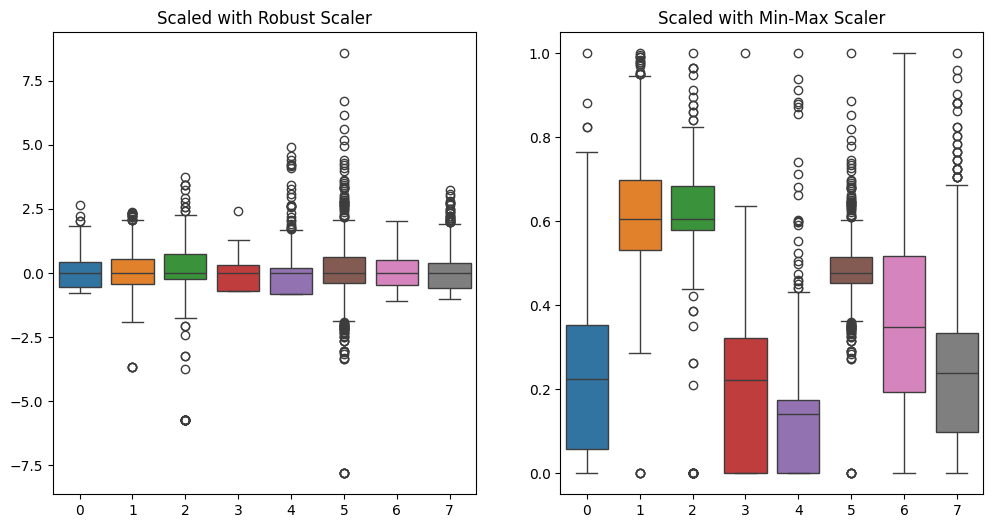

In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler

data = pd.read_csv('/content/diabetes - diabetes.csv')

missing_columns = data.columns[data.isnull().any()]

imputer_mean = SimpleImputer(strategy='mean')
data_mean_imputed = data.copy()
data_mean_imputed[missing_columns] = imputer_mean.fit_transform(data[missing_columns])

imputer_median = SimpleImputer(strategy='median')
data_median_imputed = data.copy()
data_median_imputed[missing_columns] = imputer_median.fit_transform(data[missing_columns])

imputer_mode = SimpleImputer(strategy='most_frequent')
data_mode_imputed = data.copy()
data_mode_imputed[missing_columns] = imputer_mode.fit_transform(data[missing_columns])

plt.figure(figsize=(10, 8))
corr = data_mean_imputed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

print(data['Outcome'].value_counts())

rus = RandomUnderSampler(random_state=42)

X = data_mean_imputed.drop('Outcome', axis=1)
y = data_mean_imputed['Outcome']

X_res, y_res = rus.fit_resample(X, y)

print(y_res.value_counts())

scaler_robust = RobustScaler()
X_robust_scaled = scaler_robust.fit_transform(X_res)

scaler_minmax = MinMaxScaler()
X_minmax_scaled = scaler_minmax.fit_transform(X_res)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=X_robust_scaled, ax=ax[0])
ax[0].set_title('Scaled with Robust Scaler')
sns.boxplot(data=X_minmax_scaled, ax=ax[1])
ax[1].set_title('Scaled with Min-Max Scaler')
plt.show()
